# Observing reconstruction images by Convolutional Auto-Encoder.

This notebook demonstrates that the Convolutional Auto-Encoder can learn images and reconstruct its. Image data set for this demo is the [Weizmann horse dataset](https://avaminzhang.wordpress.com/2012/12/07/%E3%80%90dataset%E3%80%91weizmann-horses/).

Firstly, import Python and Cython modules for building Convolutional Auto-Encoder.

In [1]:
from pydbm.cnn.convolutional_neural_network import ConvolutionalNeuralNetwork
from pydbm.cnn.convolutionalneuralnetwork.residual_learning import ResidualLearning
from pydbm.cnn.convolutionalneuralnetwork.convolutional_auto_encoder import ConvolutionalAutoEncoder
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer1
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer2
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer3
from pydbm.cnn.layerablecnn.max_pooling_layer import MaxPoolingLayer
from pydbm.cnn.featuregenerator.image_generator import ImageGenerator

In [2]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam

In [3]:
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph1
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph2
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph3

In [4]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

Set hyperparameters of feature points in image data.

In [5]:
batch_size = 10
channel = 3
height = 100
width = 100
scale = 0.01

Instantiate objects and call the method.

In [6]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [7]:
conv1 = ConvolutionLayer1(
    ConvGraph1(
        activation_function=TanhFunction(),
        filter_num=batch_size,
        channel=channel,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

conv2 = MaxPoolingLayer(
    ConvGraph2(
        activation_function=IdentityFunction(),
        filter_num=channel,
        channel=batch_size,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=0
    ),
    pool_height=4,
    pool_width=4
)

cnn = ConvolutionalAutoEncoder(
    layerable_cnn_list=[
        conv1, 
        conv2,
    ],
    epochs=100,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=25,
    computable_loss=MeanSquaredError(),
    opt_params=Adam(),
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15,
    save_flag=False,
    output_no_bias_flag=True
)

feature_generator = ImageGenerator(
    epochs=100,
    batch_size=batch_size,
    training_image_dir="../../../../../Downloads/rgb//",
    test_image_dir="../../../../../Downloads/rgb//",
    seq_len=None,
    gray_scale_flag=False,
    wh_size_tuple=(height, width),
    norm_mode="z_score"
)

Setup CNN layers and the parameters.
Setup Convolutional Auto-Encoder and the parameters.


Execute learning.

In [8]:
cnn.learn_generated(feature_generator)

CNN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 0.9908668823052025 Test: 0.9913604868285624
Epoch: 2
Loss: 
Training: 0.9917149971486912 Test: 0.9909876730457835
Epoch: 3
Loss: 
Training: 0.9919554432511762 Test: 0.9912056182087106
Epoch: 4
Loss: 
Training: 0.9911773667062509 Test: 0.9917785822490213
Best params are updated.
Epoch: 5
Loss: 
Training: 0.990728227495137 Test: 0.9914393029079226
Epoch: 6
Loss: 
Training: 0.9907725989016 Test: 0.9908435281039332
Epoch: 7
Loss: 
Training: 0.9914093547840527 Test: 0.9916097024176572
Epoch: 8
Loss: 
Training: 0.9921668517426747 Test: 0.9909798625167457
Epoch: 9
Loss: 
Training: 0.99196897979148 Test: 0.9920147117871971
Epoch: 10
Loss: 
Training: 0.9909187627755636 Test: 0.9914382827250563
Epoch: 11
Loss: 
Training: 0.991742258113949 Test: 0.9918599444295885
Rolling mean of Loss (Window is 10): 
Training: 0.9913679464901831 Test: 0.991365775079059
Epoch: 12
Loss: 
Training: 0.9919995127397632 Test: 0.9917334576428055
Ro

Epoch: 57
Loss: 
Training: 0.9920895669056056 Test: 0.9911397022053646
Rolling mean of Loss (Window is 10): 
Training: 0.9923399792849257 Test: 0.9923548833349892
Epoch: 58
Loss: 
Training: 0.992569192488348 Test: 0.9922217910957841
Rolling mean of Loss (Window is 10): 
Training: 0.9922487284327911 Test: 0.992184151088283
Epoch: 59
Loss: 
Training: 0.9928520298940793 Test: 0.991849956008613
Rolling mean of Loss (Window is 10): 
Training: 0.992271686271972 Test: 0.9921995153317514
Epoch: 60
Loss: 
Training: 0.9917788843261709 Test: 0.992675408860401
Rolling mean of Loss (Window is 10): 
Training: 0.9922983015528528 Test: 0.9921790020403197
Epoch: 61
Loss: 
Training: 0.9919282708240019 Test: 0.9919269878096516
Rolling mean of Loss (Window is 10): 
Training: 0.9921953302966877 Test: 0.992208972882836
Epoch: 62
Loss: 
Training: 0.9928750421033576 Test: 0.9923641388601435
Rolling mean of Loss (Window is 10): 
Training: 0.9921620521202186 Test: 0.9921424960044766
Epoch: 63
Loss: 
Training: 0

## Extract reconstruction images.

The object `cnn` which is-a `ConvolutionalAutoEncoder` has a method `inference` to be able to reconstruct observed data points as feature points. The input test data and reconstructed data are as follows.

test data:


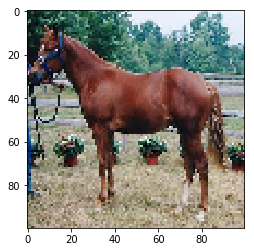

reconstructed data:


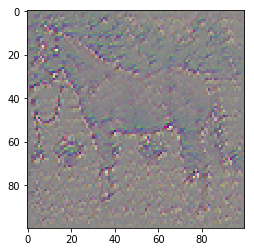

test data:


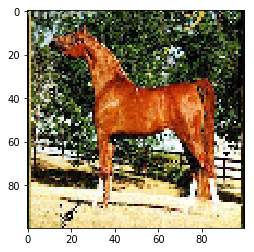

reconstructed data:


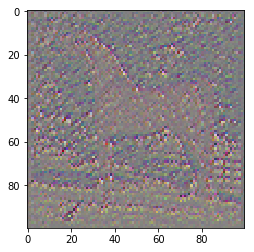

test data:


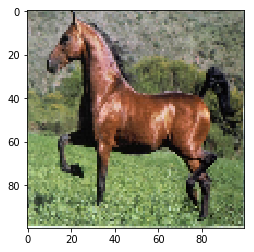

reconstructed data:


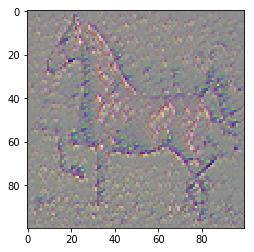

test data:


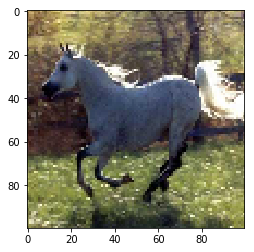

reconstructed data:


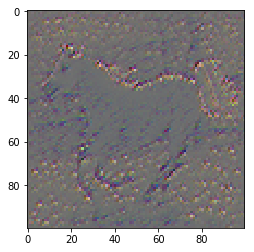

test data:


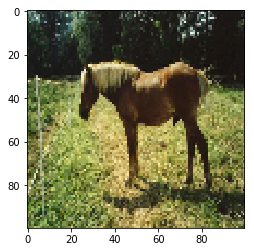

reconstructed data:


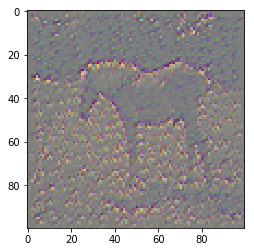

test data:


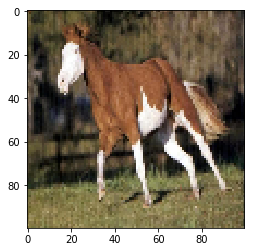

reconstructed data:


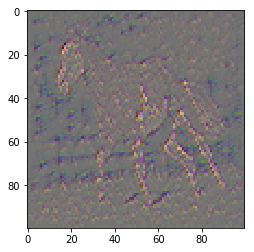

test data:


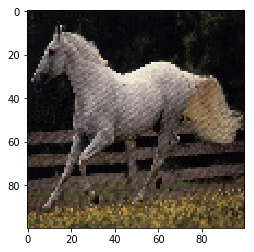

reconstructed data:


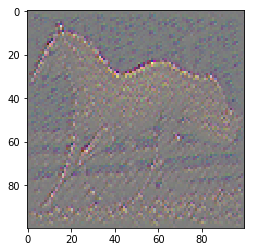

test data:


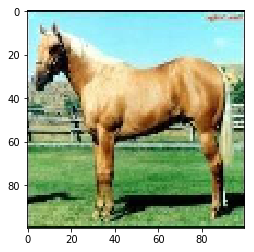

reconstructed data:


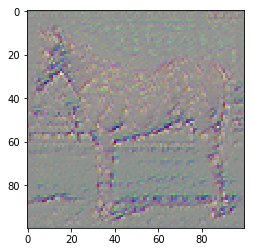

test data:


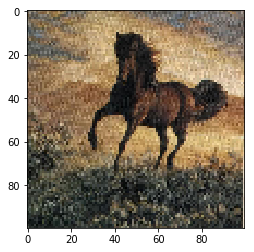

reconstructed data:


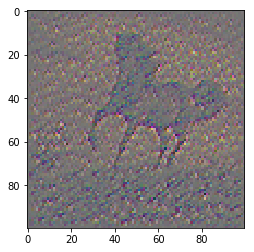

test data:


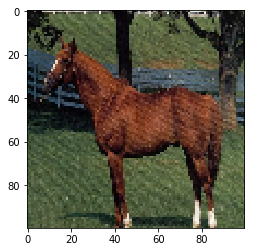

reconstructed data:


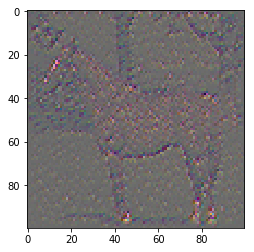

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def plot(arr):
    arr = 255 * (arr - arr.min()) / (arr.max() - arr.min())
    arr = arr.transpose(1, 2, 0).astype(np.uint8)
    plt.imshow(arr)
    plt.show()
    plt.close()

test_len = 0
test_limit = 1

test_arr_list = []
rec_arr_list = []
for batch_observed_arr, batch_target_arr, test_batch_observed_arr, test_batch_target_arr in feature_generator.generate():
    test_len += 1
    result_arr = cnn.inference(test_batch_observed_arr)
    for batch in range(test_batch_target_arr.shape[0]):
        test_batch_target_arr = (test_batch_target_arr - test_batch_target_arr.min()) / (test_batch_target_arr.max() - test_batch_target_arr.min())
        print("test data:")
        plot(test_batch_target_arr[batch])
        test_arr_list.append(test_batch_target_arr[batch][0])
        print("reconstructed data:")
        plot(result_arr[batch])
    if test_len >= test_limit:
        break
